<a href="https://colab.research.google.com/github/agustinLapi/Fractales/blob/main/Fractales_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def euler(ecuation, p_x_0, p_y_0, step_size, iterations):
  x = []
  y = []  
  x_0 = p_x_0
  y_0 = p_y_0
  x.append(x_0)
  y.append(y_0)
  for i in range(iterations):
    if ecuation== 'a':
      x_prima = x_0*x_0*y_0*y_0+1
      y_prima = 2*x_0*y_0+1
    elif ecuation== 'b':
      x_prima = y_0
      y_prima = x_0-x_0*x_0*x_0
    elif ecuation== 'c':
      x_prima = x_0*(1-y_0)
      y_prima = x_0*y_0
    elif ecuation== 'd':
      x_prima = -y_0
      y_prima = x_0
    elif ecuation== 'e':
      x_prima = -y_0 + x_0*(x_0*x_0+y_0*y_0)
      y_prima = x_0  + y_0*(x_0*x_0+y_0*y_0)
    elif ecuation== 'f':
      x_prima = -y_0 - x_0*(x_0*x_0+y_0*y_0)
      y_prima = x_0  - y_0*(x_0*x_0+y_0*y_0)
    x_delta = step_size*x_prima
    y_delta = step_size*y_prima
    x_next  = x[-1]+x_delta
    y_next  = y[-1]+y_delta
    x.append(x_next)
    y.append(y_next)
    x_0 = x_next
    y_0 = y_next
  return x,y


def sembrar(N, x, y, mode):
  seeds_x = []
  seeds_y = []
  if mode=='random':
    for i in range(N):
      if random.randint(0,1):
        seeds_x.append( -random.random() + random.randint(x[0],x[1]) )
      else:
        seeds_x.append(  random.random() + random.randint(x[0],x[1]) )
      if random.randint(0,1):
        seeds_y.append( -random.random() + random.randint(y[0],y[1]) )
      else:
        seeds_y.append(  random.random() + random.randint(y[0],y[1]) )
  elif mode=='uniform':
    step_j = (x[1]-x[0])/N
    step_k = (y[1]-y[0])/N
    j = 0
    k = 0
    for jj in range(x[0],x[1],1):
      j = j + step_j
      for kk in range(y[0],y[1],1):
        k = k + step_k
        seeds_x.append(jj+j)
        seeds_y.append(kk+k)
        #print(jj+j,kk+k)
      j = 0
      k = 0
  elif mode=='gaus':
    step_j = (x[1]-x[0])/N
    step_k = (y[1]-y[0])/N
    ratio_j = step_j/2
    ratio_k = step_k/2  
    j = 0
    k = 0
    for jj in range(x[0],x[1],1):
      j = j + step_j
      for kk in range(y[0],y[1],1):
        k = k + step_k
        seeds_x.append(jj+j+np.random.normal(0, ratio_j))
        seeds_y.append(kk+k+np.random.normal(0, ratio_k))
        #print(jj+j,kk+k)
      j = 0
      k = 0
  return seeds_x, seeds_y

def runge_kutta(ecuation, p_x_0, p_y_0, step_size, iterations):
  x = []
  y = []  
  x_0 = p_x_0
  y_0 = p_y_0
  x.append(x_0)
  y.append(y_0)
  for i in range(iterations):
    if ecuation== 'a':
      x_k1 = x_0*x_0*y_0*y_0+1
      y_k1 = 2*x_0*y_0+1
      x_delta_k1 = step_size*x_k1 #k1 
      y_delta_k1 = step_size*y_k1 #k1
      x_0 = x_0 + step_size*0.5
      y_0_k2 = y_0 + 0.5* y_delta_k1
      x_k2 = x_0*x_0*y_0_k2*y_0_k2+1
      y_k2 = 2*x_0*y_0_k2+1
      x_delta_k2 = step_size*x_k2 #k2 
      y_delta_k2 = step_size*y_k2 #k2
      y_0_k3 = y_0 + 0.5* y_delta_k2
      x_k3 = x_0*x_0*y_0*y_0+1
      y_k3 = 2*x_0*y_0+1
      x_delta_k3 = step_size*x_k3 #k3 
      y_delta_k3 = step_size*y_k3 #k3
      x_0 = x_0 + step_size*0.5
      y_0_k4 = y_0 + y_delta_k4
      x_k4 = x_0*x_0*y_0*y_0+1
      y_k4 = 2*x_0*y_0+1
      x_delta_k4 = step_size*x_k4 #k4 
      y_delta_k4 = step_size*y_k4 #k4

#No terminado Runge Kutta
 #   x_next  = x[-1]+x_delta
#    y_next  = y[-1]+y_delta
  #  x.append(x_next)
  #  y.append(y_next)
  #  x_0 = x_next
  #  y_0 = y_next
  return x,y


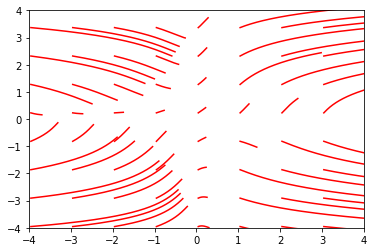

In [ ]:
N = 175
initial_x, initial_y = sembrar(N, [-4,4], [-4,4], 'uniform')
plt.figure()
for i in range(len(initial_y)):
  x,y = euler('a', initial_x[i], initial_y[i], 0.001, N)
  plt.plot(x,y,'r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()


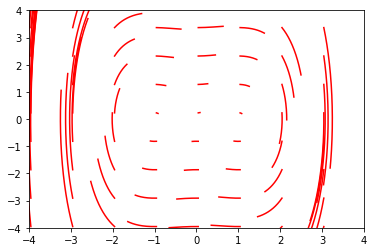

In [ ]:
N = 175
initial_x, initial_y = sembrar(N, [-4,4], [-4,4], 'uniform')
plt.figure()
for i in range(len(initial_y)):
  x,y = euler('b', initial_x[i], initial_y[i], 0.001, N)
  plt.plot(x,y,'r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

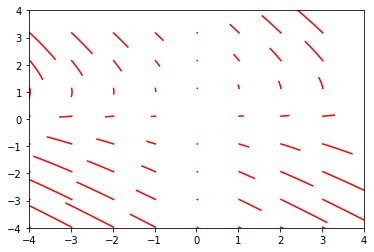

In [ ]:
N = 375
initial_x, initial_y = sembrar(N, [-4,4], [-4,4], 'uniform')
plt.figure()
for i in range(len(initial_y)):
  x,y = euler('c', initial_x[i], initial_y[i], 0.001, 100)
  plt.plot(x,y,'r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

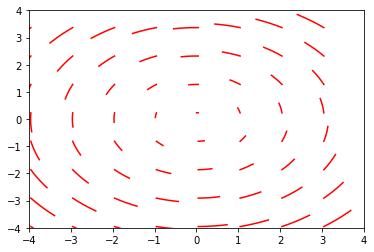

In [ ]:
N = 175
initial_x, initial_y = sembrar(N, [-4,4], [-4,4], 'uniform')
plt.figure()
for i in range(len(initial_y)):
  x,y = euler('d', initial_x[i], initial_y[i], 0.001, N)
  plt.plot(x,y,'r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

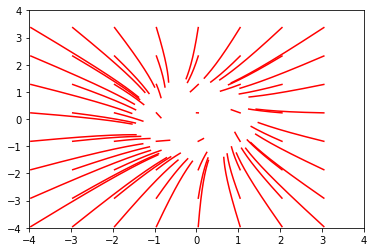

In [ ]:
N = 175
initial_x, initial_y = sembrar(N, [-4,4], [-4,4], 'uniform')
plt.figure()
for i in range(len(initial_y)):
  x,y = euler('f', initial_x[i], initial_y[i], 0.001, N)
  plt.plot(x,y,'r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

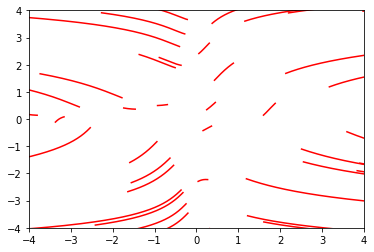

In [ ]:
N = 10
initial_x, initial_y = sembrar(N, [-5,5], [-5,5], 'gaus')
#initial_x_2, initial_y_2 = sembrar(N, [-4,4], [-4,4], 'uniform')
plt.figure()
N_2 = 200
for i in range(len(initial_y)):
  x,y = euler('a', initial_x[i], initial_y[i], 0.001, N_2)
  plt.plot(x,y,'r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

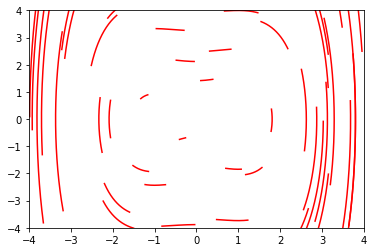

In [ ]:
N = 10
initial_x, initial_y = sembrar(N, [-5,5], [-5,5], 'gaus')
#initial_x_2, initial_y_2 = sembrar(N, [-4,4], [-4,4], 'uniform')
plt.figure()
N_2 = 200
for i in range(len(initial_y)):
  x,y = euler('b', initial_x[i], initial_y[i], 0.001, N_2)
  plt.plot(x,y,'r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

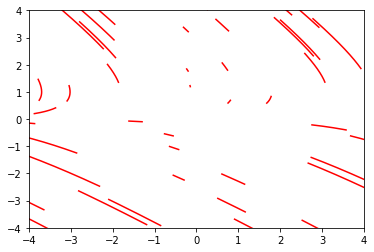

In [ ]:
N = 10
initial_x, initial_y = sembrar(N, [-5,5], [-5,5], 'gaus')
#initial_x_2, initial_y_2 = sembrar(N, [-4,4], [-4,4], 'uniform')
plt.figure()
N_2 = 200
for i in range(len(initial_y)):
  x,y = euler('c', initial_x[i], initial_y[i], 0.001, N_2)
  plt.plot(x,y,'r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

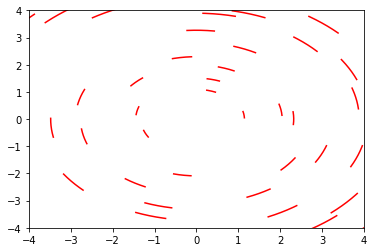

In [ ]:
N = 10
initial_x, initial_y = sembrar(N, [-5,5], [-5,5], 'gaus')
#initial_x_2, initial_y_2 = sembrar(N, [-4,4], [-4,4], 'uniform')
plt.figure()
N_2 = 200
for i in range(len(initial_y)):
  x,y = euler('d', initial_x[i], initial_y[i], 0.001, N_2)
  plt.plot(x,y,'r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

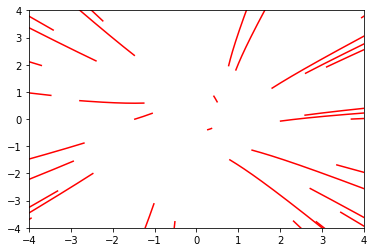

In [ ]:
N = 10
initial_x, initial_y = sembrar(N, [-5,5], [-5,5], 'gaus')
#initial_x_2, initial_y_2 = sembrar(N, [-4,4], [-4,4], 'uniform')
plt.figure()
N_2 = 200
for i in range(len(initial_y)):
  x,y = euler('e', initial_x[i], initial_y[i], 0.001, N_2)
  plt.plot(x,y,'r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

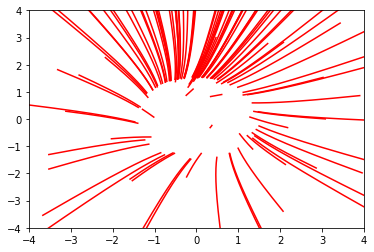

In [ ]:
N = 10
initial_x, initial_y = sembrar(N, [-5,5], [-5,5], 'gaus')
#initial_x_2, initial_y_2 = sembrar(N, [-4,4], [-4,4], 'uniform')
plt.figure()
N_2 = 200
for i in range(len(initial_y)):
  x,y = euler('f', initial_x[i], initial_y[i], 0.001, N_2)
  plt.plot(x,y,'r')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()